In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

# Glu Dataset 6

# Preprocessing Glu 6

In [949]:
df_glu_6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/6_RSV1_10ul_9min_NewOmics.xlsx')
df_glu_6.info()

In [950]:
df_glu_6 = thermo_df(df_glu_6)
df_glu_6 = df_glu_6.dropna()

In [6]:
df_glu_6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB6_std.xlsx')
df_glu_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 4 columns):
Unnamed: 0    818 non-null int64
Mass          818 non-null float64
RT            818 non-null float64
Vol           818 non-null float64
dtypes: float64(3), int64(1)
memory usage: 25.6 KB


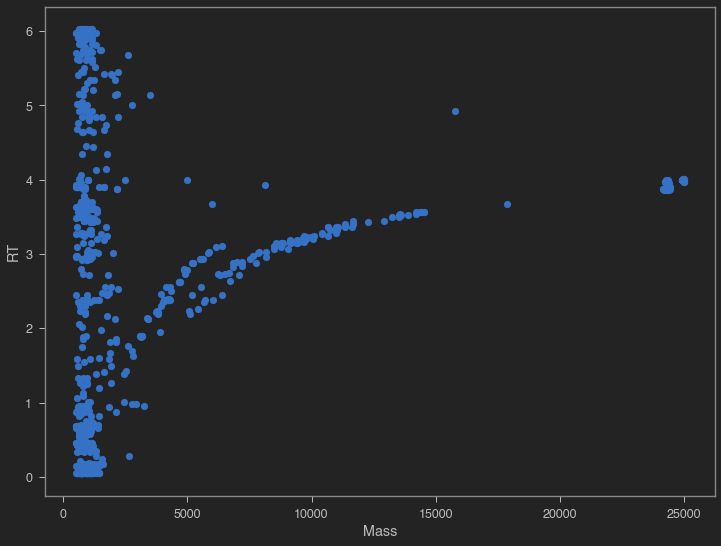

In [7]:
plot_zone(df_glu_6)

In [934]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_glu_6 = df_glu_6[(df_glu_6.Mass > 3291) & (df_glu_6.Mass < 15401)]
# df_draw = df_glu_6_kernel
df_draw = df_glu_6
x = df_draw.Mass
y = df_draw.RT
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '57e281b…

points [321, 334, 362, 388, 395, 403, 408, 460, 463, 493, 509, 513, 525, 552, 564, 602, 612, 643, 649, 652, 662, 679, 681, 684, 695, 700, 717, 719, 720, 724, 732, 746, 749, 751, 756, 764, 767, 769, 778, 779, 785, 787, 793]


In [935]:
df_glu_6_kernel = df_draw.iloc[idxs]
df_glu_6_kernel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1308 to 2869
Data columns (total 3 columns):
Mass    43 non-null float64
RT      43 non-null float64
Vol     43 non-null object
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [936]:
df_glu_6_kernel = df_glu_6_kernel.sort_values('Vol', ascending=False)
df_glu_6_kernel_top = df_glu_6_kernel[:100]
fig = px.scatter(x=df_glu_6_kernel_top.Mass, y=df_glu_6_kernel_top.RT)
fig.show()
# plot_zones(df_glu_top_a, df_glu_top_b)

mass_x (43,) mass_y (43,)
df3_idxs 8 df5_idxs 8
df3_idxs 0 df5_idxs 0
df3_idxs 7 df5_idxs 7
df3_idxs 5 df5_idxs 5
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 2 df5_idxs 2


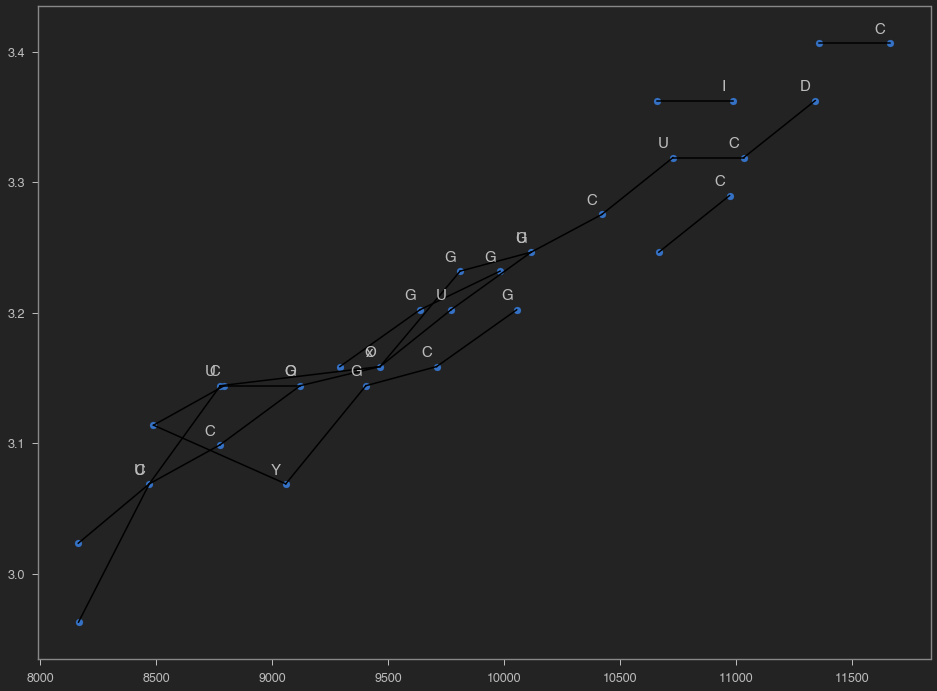

In [937]:
# df_paired_5p_top = df_paired_5p.sort_values('Vol', ascending=False).iloc[:27]
bcr_5p = base_calling_random(df_glu_6_kernel_top)
plot_basecalling(*bcr_5p, annotate=True)